In [7]:
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import shutil
import matplotlib.pyplot as plt

# Data Pipline

`split_data.ipynb` -> `metadata.ipynb` -> `split_video.ipynb` -> `interpolation.ipynb`

In [3]:
df_sports = pd.read_csv("../sports_metadata.csv")

df_sports

,video_name,action_idx,category,frames,resize,source_video,split,action,new_split,frames_new
0,01_0001_v_-hyYa8ijq-8_c001.mp4,1,aerobic_gymnastics,31,False,v_-hyYa8ijq-8_c001.mp4,train,explosive push up,train,61
1,01_0002_v_-hyYa8ijq-8_c001.mp4,1,aerobic_gymnastics,31,True,v_-hyYa8ijq-8_c001.mp4,train,explosive push up,train,61
2,01_0003_v_-hyYa8ijq-8_c001.mp4,1,aerobic_gymnastics,32,False,v_-hyYa8ijq-8_c001.mp4,train,explosive push up,train,32
3,05_0001_v_-hyYa8ijq-8_c001.mp4,5,aerobic_gymnastics,89,False,v_-hyYa8ijq-8_c001.mp4,train,support,train,89
4,05_0002_v_-hyYa8ijq-8_c001.mp4,5,aerobic_gymnastics,87,False,v_-hyYa8ijq-8_c001.mp4,train,support,train,87
...,...,...,...,...,...,...,...,...,...,...
41892,mGRum47TLX0_00040.mp4,47,diving,57,True,mGRum47TLX0_00040.mp4,test,Reverse Dive NoTwis TUCK,val,57
41893,mGRum47TLX0_00044.mp4,47,diving,113,True,mGRum47TLX0_00044.mp4,test,Reverse Dive NoTwis TUCK,test,113
41894,ovWCmIMMkRI_00050.mp4,47,diving,109,True,ovWCmIMMkRI_00050.mp4,test,Reverse Dive NoTwis TUCK,val,109
41895,ovWCmIMMkRI_00051.mp4,47,diving,126,True,ovWCmIMMkRI_00051.mp4,test,Reverse Dive NoTwis TUCK,test,126


In [4]:
df_sports['interpolation'] = ~(df_sports['frames'] == df_sports['frames_new'])

In [5]:
df_sports[df_sports['category'] == 'basketball']['frames_new'].std()

21.617992069611983

In [6]:
for cat in df_sports.category.unique():
    size_df = len(df_sports[df_sports['category'] == cat])

    size_train = len(df_sports[(df_sports['category'] == cat) & (df_sports['new_split'] == 'train')])
    size_val = len(df_sports[(df_sports['category'] == cat) & (df_sports['new_split'] == 'val')])
    size_test = len(df_sports[(df_sports['category'] == cat) & (df_sports['new_split'] == 'test')])

    min_df = df_sports[df_sports['category'] == cat]['frames_new'].min()
    max_df = df_sports[df_sports['category'] == cat]['frames_new'].max()
    mean_df = df_sports[df_sports['category'] == cat]['frames_new'].mean()
    std_df = df_sports[df_sports['category'] == cat]['frames_new'].std()

    resize = len(df_sports[(df_sports['category'] == cat) & (df_sports['resize'] == True)])
    resize_train = len(df_sports[(df_sports['category'] == cat) & (df_sports['new_split'] == 'train')])
    resize_val = len(df_sports[(df_sports['category'] == cat) & (df_sports['new_split'] == 'val')])
    resize_test = len(df_sports[(df_sports['category'] == cat) &  (df_sports['new_split'] == 'test')])
    resize_train_true = len(df_sports[(df_sports['category'] == cat) & (df_sports['resize'] == True) & (df_sports['new_split'] == 'train')])
    resize_val_true = len(df_sports[(df_sports['category'] == cat) & (df_sports['resize'] == True) & (df_sports['new_split'] == 'val')])
    resize_test_true = len(df_sports[(df_sports['category'] == cat) & (df_sports['resize'] == True) & (df_sports['new_split'] == 'test')])

    interpolation = len(df_sports[(df_sports['category'] == cat) & (df_sports['interpolation'] == True)])
    interpolation_train = len(df_sports[(df_sports['category'] == cat) & (df_sports['new_split'] == 'train')])
    interpolation_val = len(df_sports[(df_sports['category'] == cat) & (df_sports['new_split'] == 'val')])
    interpolation_test = len(df_sports[(df_sports['category'] == cat) & (df_sports['new_split'] == 'test')])
    interpolation_train_true = len(df_sports[(df_sports['category'] == cat) & (df_sports['interpolation'] == True) & (df_sports['new_split'] == 'train')])
    interpolation_val_true = len(df_sports[(df_sports['category'] == cat) & (df_sports['interpolation'] == True) & (df_sports['new_split'] == 'val')])
    interpolation_test_true = len(df_sports[(df_sports['category'] == cat) & (df_sports['interpolation'] == True) & (df_sports['new_split'] == 'test')])
                     

    print(cat)
    print(size_df)
    print(size_train,size_val,size_test)
    print(round(size_train / size_df * 100) , round(size_val / size_df * 100) , round(size_test / size_df * 100))
    print(min_df,max_df,mean_df,std_df)
    print(round(resize / size_df * 100))
    print(resize_train_true, resize_val_true, resize_test_true)
    print(round(resize_train_true / resize_train * 100) , round(resize_val_true / resize_val * 100) , round(resize_test_true / resize_test * 100))
    print(round(interpolation / size_df * 100))
    print(interpolation_train_true, interpolation_val_true, interpolation_test_true)
    print(round(interpolation_train_true / interpolation_train * 100) , round(interpolation_val_true / interpolation_val* 100) , round(interpolation_test_true / interpolation_test * 100))
    print()


aerobic_gymnastics
5606
4192 707 707
75 13 13
33 151 55.05993578308955 15.168867252817847
55
2508 267 290
60 38 41
60
2512 417 423
60 59 60

basketball
6233
4524 854 855
73 14 14
33 438 62.166693406064496 21.617992069611983
19
824 178 171
18 21 20
83
3764 724 713
83 85 83

football
8224
6083 1070 1071
74 13 13
33 223 59.1175826848249 11.065399307935904
7
446 74 56
7 7 5
90
5481 966 976
90 90 91

volleyball
4837
3546 645 646
73 13 13
33 64 55.78519743642754 5.571362365306329
9
341 37 36
10 6 6
97
3435 620 630
97 96 98

diving
16997
15027 985 985
88 6 6
33 823 158.8412072718715 72.82405379513793
100
15027 985 985
100 100 100
0
22 3 2
0 0 0



In [10]:
df_sports[(df_sports['category'] == 'basketball') & (df_sports['interpolation'] == True)]

,video_name,action_idx,category,frames,resize,source_video,split,action,new_split,frames_new,interpolation
5606,48_0001_v_-6Os86HzwCs_c001.mp4,48,basketball,6,False,v_-6Os86HzwCs_c001.mp4,test,pass,val,61,True
5607,48_0002_v_-6Os86HzwCs_c001.mp4,48,basketball,4,False,v_-6Os86HzwCs_c001.mp4,test,pass,test,64,True
5608,48_0003_v_-6Os86HzwCs_c001.mp4,48,basketball,5,False,v_-6Os86HzwCs_c001.mp4,test,pass,val,61,True
5609,48_0004_v_-6Os86HzwCs_c001.mp4,48,basketball,6,False,v_-6Os86HzwCs_c001.mp4,test,pass,val,61,True
5615,50_0006_v_-6Os86HzwCs_c001.mp4,50,basketball,8,False,v_-6Os86HzwCs_c001.mp4,test,dribble,test,64,True
...,...,...,...,...,...,...,...,...,...,...,...
11833,51_0001_v_V4tIg2zSbWU_c010.mp4,51,basketball,15,False,v_V4tIg2zSbWU_c010.mp4,train,3-point shot,train,57,True
11834,57_0001_v_V4tIg2zSbWU_c010.mp4,57,basketball,6,False,v_V4tIg2zSbWU_c010.mp4,train,pass steal,train,61,True
11835,60_0001_v_V4tIg2zSbWU_c010.mp4,60,basketball,16,False,v_V4tIg2zSbWU_c010.mp4,train,pick-and-roll defensive,train,61,True
11836,60_0002_v_V4tIg2zSbWU_c010.mp4,60,basketball,11,False,v_V4tIg2zSbWU_c010.mp4,train,pick-and-roll defensive,train,61,True


In [19]:
for cat in df_sports["category"].unique():
    print(cat)
    print(round(len(df_sports[(df_sports["category"] == cat) & (df_sports['frames'] < 33)]) / len(df_sports[df_sports["category"] == cat]) * 100))
    print()

aerobic_gymnastics
60

basketball
83

football
90

volleyball
96

diving
0



In [15]:
len(df_sports)

41897

In [15]:
len(df_sports['action_idx'].unique())

66

In [18]:
len(df_sports[df_sports['category'] == 'diving']['action_idx'].unique())

47

In [20]:
df_sports[df_sports['category'] == 'diving']['split'].value_counts() / len(df_sports[df_sports['category'] == 'diving'])

split
train    0.884097
test     0.115903
Name: count, dtype: float64

In [23]:
for cat in ['aerobic_gymnastics', 'basketball', 'football', 'volleyball']:
    size_df = len(df_sports[df_sports['category'] == cat])

    size_train = len(df_sports[(df_sports['category'] == cat) & (df_sports['split'] == 'train')])
    size_test = len(df_sports[(df_sports['category'] == cat) & (df_sports['split'] == 'test')])

    min_df = df_sports[df_sports['category'] == cat]['frames'].min()
    max_df = df_sports[df_sports['category'] == cat]['frames'].max()
    mean_df = df_sports[df_sports['category'] == cat]['frames'].mean()
    std_df = df_sports[df_sports['category'] == cat]['frames'].std()

    resize = len(df_sports[(df_sports['category'] == cat) & (df_sports['resize'] == True)])
              
    print(cat)
    print(size_df)
    print(size_train,size_test)
    print(round(size_train / size_df * 100) , round(size_test / size_df * 100))
    print(min_df,max_df,mean_df,std_df)
    print(round(resize / size_df * 100))
    print()


aerobic_gymnastics
5606
4192 1414
75 25
5 151 37.25579735997146 21.327316966497172
55

basketball
6233
4524 1709
73 27
2 438 23.64495427562971 32.432642957953966
19

football
8224
6083 2141
74 26
3 223 18.47227626459144 19.177428559176633
7

volleyball
4837
3546 1291
73 27
3 61 18.18958031837916 7.422624787509817
9



In [84]:
pl_ang = {"aerobic_gymnastics" : "Aerobik gimnastyczny",
 "basketball" : "Koszykówka",
 "football" : "Piłka nożna",
 "volleyball" : "Siatkówka",
 "diving" : "Skoki do wody"}

In [18]:
dict_volleyball = {
    'serve': 'serwis',
    'first_pass': 'odbiór',
    'second_pass': 'wystawa',
    'spike': 'atak',
    'block': 'blok',
    'defend': 'przyjęcie',
    'dink': 'kiwnięcie',
    'no_offensive_attack': 'brak ataku',
    'protect': 'asekuracja',
    'save': 'obrona padem',
    'adjust': 'dogranie',
    'second_attack': 'atak w drugie tempo'
}

dict_basketball = {
    'pass' : 'podanie',
    'dribble' : 'kozłowanie',
    '2-point_shot' : 'rzut za 2 pkt.',
    'drive' : 'wjazd',
    'offensive_rebound' : 'zbiórka w ataku',
    'screen' : 'zasłona', 
    'interfere_shot' : 'utrudnianie rzutu', 
    'defensive_rebound' : 'zbiórka w obronie',
    'block' : 'blok',
    '3-point_shot' : 'rzut za 3 pkt.', 
    'pass-inbound' : 'podanie zza boiska',
    'free_throw' : 'rzut osobisty',
    'pass_steal' : 'przechwyt podania',
    'pick-and-roll_defensive' : 'obrona pick-and-roll',
    'sag' : 'obniżona obrona',
    'save' : 'ocalenie piłki',
    'jump_ball' : 'rzut sędziowski',
    'dribble_steal' : 'przechwyt w koźle'
}

dict_aerobic = {
    'explosive_push_up' : 'eksplozywna pompka', 
    'support' : 'podparcie',
    'straddle_jump' : 'skok z rozkrokiem',
    'bent_leg(s)_jump' : 'skok z ugiętymi nogami',
    'split_jump' : 'skok ze szpagatem', 
    'scissors_leap' : 'skok-nożyce',
    'pike_jump' : 'wyprostowany skok',
    'turn' : 'obrót',
    'illusion' : 'iluzja',
    'explosive_support' : 'eksplozywne podparcie',
    'straight_jump' : 'klasyczny skok',
    'horizontal_support' : 'poziome podparcie',
    'helicopter' : 'helikopter',
    'leg_circle' : 'okrąg',
    'push_up' : 'pompka',
    'split' : 'szpagat',
    'butterfly_jump' : 'skok motylkowy',
    'v_support' : 'podparcie V',
    'off_axis_jump' : 'skok ze zmianą osi',
    'balance_turn' : 'obrót z balansem',
    'kick_jump' : 'skok z kopnięciem'
}

dict_football = {
    'trap' : 'przyjęcie kierunkowe',
    'through_pass' : 'podanie prostopadłe',
    'short_pass' : 'krótkie podanie',
    'long_pass' : 'długie podanie',
    'aerial_duels' : 'pojedynek w powietrzu',
    'clearance' : 'wybicie na uwolnienie',
    'dribble' : 'drybling',
    'press' : 'gra obronna',
    'cross' : 'dośrodkowanie',
    'diving' : 'obrona strzału przez bramkarza',
    'steal' : 'przecięcie podania',
    'tackle' : 'przejęcie piłki',
    'shoot' : 'strzał',
    'block' : 'blok',
    'throw' : 'rzut z autu'
}

C:\Users\Admin\AppData\Local\Temp\ipykernel_3996\885178661.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['action'] = df['action'].str.replace(' ','_')
C:\Users\Admin\AppData\Local\Temp\ipykernel_3996\885178661.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['action'] = df['action'].map(dict_basketball)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3996\885178661.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

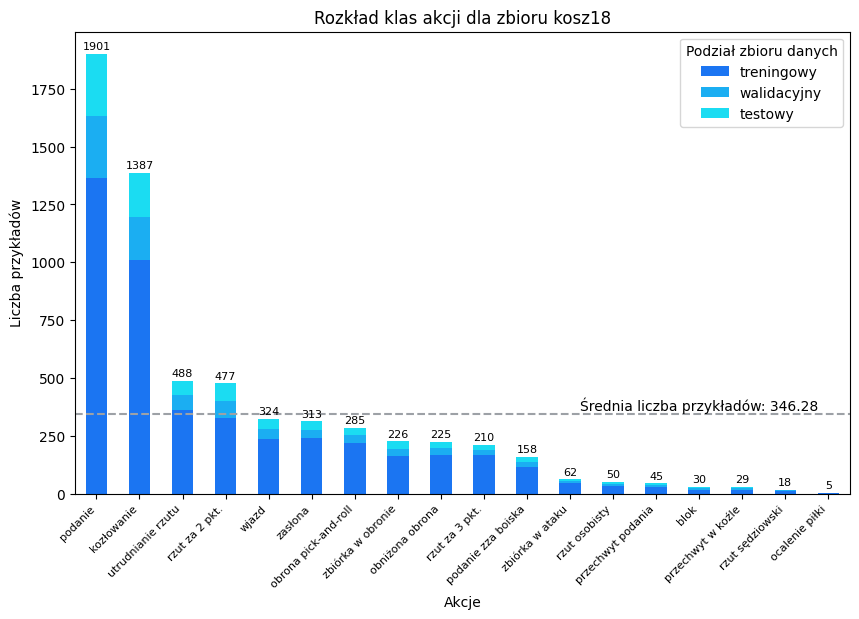

In [54]:
tts = {'train' : 'treningowy',
       'val' : 'walidacyjny',
       'test' : 'testowy'}

df = df_sports[df_sports['category'] == 'basketball']

df['action'] = df['action'].str.replace(' ','_')

df['action'] = df['action'].map(dict_basketball)

df['new_split'] = df['new_split'].map(tts)

grouped_action_x = df.groupby(['action', 'new_split']).size().unstack(fill_value=0)

sorted_grouped_action_x = grouped_action_x.loc[grouped_action_x.sum(axis=1).sort_values(ascending=False).index]

sorted_grouped_action_x = sorted_grouped_action_x[['treningowy', 'walidacyjny', 'testowy']]


average_count_sorted = sorted_grouped_action_x.sum(axis=1).mean()


sorted_grouped_action_x.plot(kind='bar', stacked=True, color=['#1b75f2', '#1baef2', '#1bdcf2'], figsize=(10, 6))

plt.axhline(average_count_sorted, color='#9da1a6', linestyle='--')

plt.text(len(sorted_grouped_action_x) - 4, average_count_sorted + 12, f'Średnia liczba przykładów: {average_count_sorted:.2f}', color='black', ha='center')

for i in range(len(sorted_grouped_action_x)):
    sum_values = sorted_grouped_action_x.iloc[i].sum()
    plt.text(i, sum_values + 10, str(sum_values), ha='center', va='bottom', fontsize=8,zorder=5)

plt.title('Rozkład klas akcji dla zbioru kosz18')
plt.xlabel('Akcje')
plt.ylabel('Liczba przykładów')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend(title='Podział zbioru danych')

plt.show()


In [22]:
df_sports.category.unique()

array(['aerobic_gymnastics', 'basketball', 'football', 'volleyball',
       'diving'], dtype=object)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3996\3817044666.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['action'] = df['action'].str.replace(' ','_')
C:\Users\Admin\AppData\Local\Temp\ipykernel_3996\3817044666.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['action'] = df['action'].map(dict_aerobic)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3996\3817044666.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

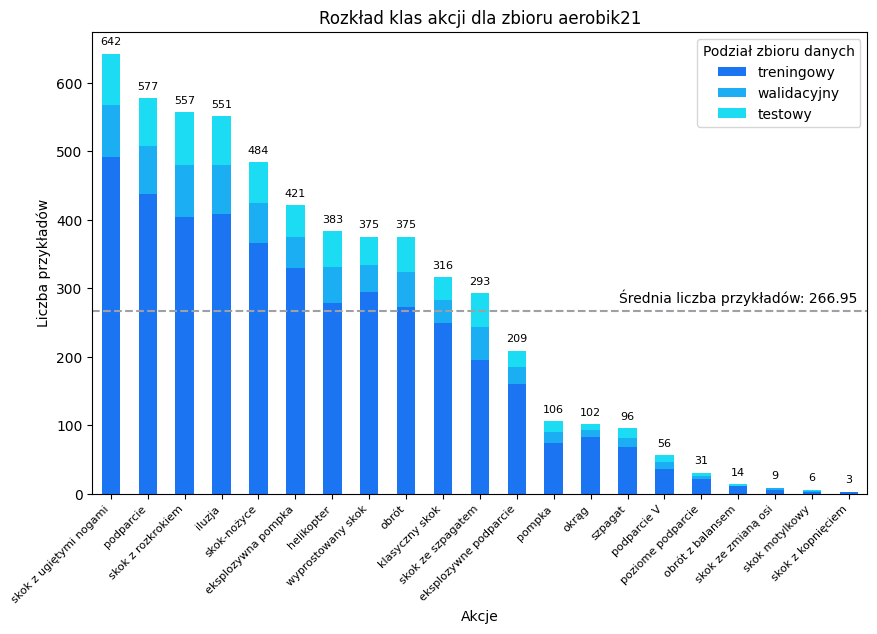

In [47]:
tts = {'train' : 'treningowy',
       'val' : 'walidacyjny',
       'test' : 'testowy'}

df = df_sports[df_sports['category'] == 'aerobic_gymnastics']

df['action'] = df['action'].str.replace(' ','_')

df['action'] = df['action'].map(dict_aerobic)

df['new_split'] = df['new_split'].map(tts)

grouped_action_x = df.groupby(['action', 'new_split']).size().unstack(fill_value=0)

sorted_grouped_action_x = grouped_action_x.loc[grouped_action_x.sum(axis=1).sort_values(ascending=False).index]

sorted_grouped_action_x = sorted_grouped_action_x[['treningowy', 'walidacyjny', 'testowy']]

average_count_sorted = sorted_grouped_action_x.sum(axis=1).mean()

sorted_grouped_action_x.plot(kind='bar', stacked=True, color=['#1b75f2', '#1baef2', '#1bdcf2'], figsize=(10, 6))

plt.axhline(average_count_sorted, color='#9da1a6', linestyle='--')

plt.text(len(sorted_grouped_action_x) - 4, average_count_sorted + 12, f'Średnia liczba przykładów: {average_count_sorted:.2f}', color='black', ha='center')

for i in range(len(sorted_grouped_action_x)):
    sum_values = sorted_grouped_action_x.iloc[i].sum()
    plt.text(i, sum_values + 10, str(sum_values), ha='center', va='bottom', fontsize=8, zorder=5)

plt.title('Rozkład klas akcji dla zbioru aerobik21')
plt.xlabel('Akcje')
plt.ylabel('Liczba przykładów')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend(title='Podział zbioru danych')

plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_3996\2202210738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['action'] = df['action'].str.replace(' ','_')
C:\Users\Admin\AppData\Local\Temp\ipykernel_3996\2202210738.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['action'] = df['action'].map(dict_football)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3996\2202210738.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

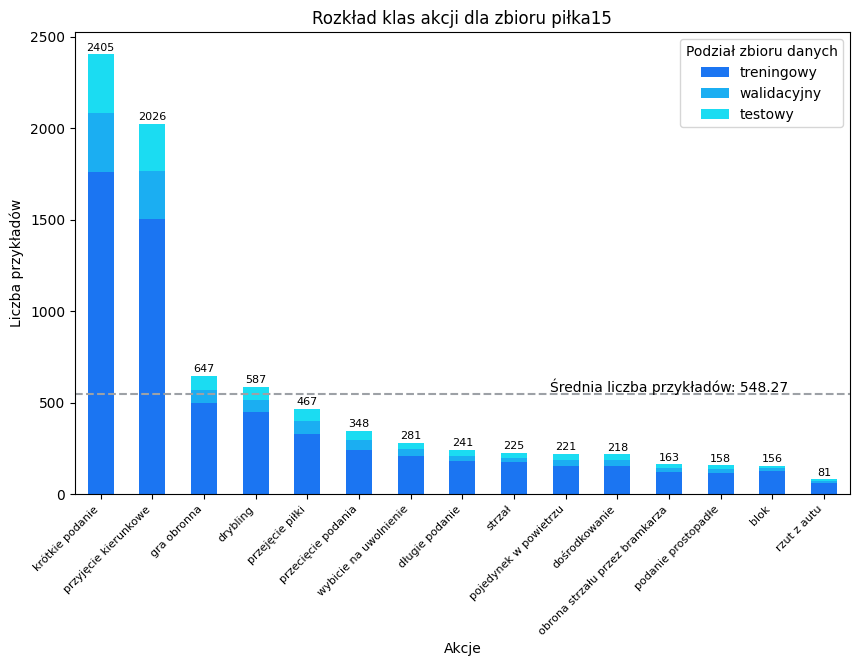

In [48]:
tts = {'train' : 'treningowy',
       'val' : 'walidacyjny',
       'test' : 'testowy'}

df = df_sports[df_sports['category'] == 'football']

df['action'] = df['action'].str.replace(' ','_')

df['action'] = df['action'].map(dict_football)

df['new_split'] = df['new_split'].map(tts)

grouped_action_x = df.groupby(['action', 'new_split']).size().unstack(fill_value=0)

sorted_grouped_action_x = grouped_action_x.loc[grouped_action_x.sum(axis=1).sort_values(ascending=False).index]

sorted_grouped_action_x = sorted_grouped_action_x[['treningowy', 'walidacyjny', 'testowy']]


average_count_sorted = sorted_grouped_action_x.sum(axis=1).mean()

sorted_grouped_action_x.plot(kind='bar', stacked=True, color=['#1b75f2', '#1baef2', '#1bdcf2'], figsize=(10, 6))

plt.axhline(average_count_sorted, color='#9da1a6', linestyle='--')

plt.text(len(sorted_grouped_action_x) - 4, average_count_sorted + 12, f'Średnia liczba przykładów: {average_count_sorted:.2f}', color='black', ha='center')

for i in range(len(sorted_grouped_action_x)):
    sum_values = sorted_grouped_action_x.iloc[i].sum()
    plt.text(i, sum_values + 10, str(sum_values), ha='center', va='bottom', fontsize=8,zorder=5)


plt.title('Rozkład klas akcji dla zbioru piłka15')
plt.xlabel('Akcje')
plt.ylabel('Liczba przykładów')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend(title='Podział zbioru danych')

plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_3996\1227528151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['action'] = df['action'].str.replace(' ','_')
C:\Users\Admin\AppData\Local\Temp\ipykernel_3996\1227528151.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['action'] = df['action'].map(dict_volleyball)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3996\1227528151.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

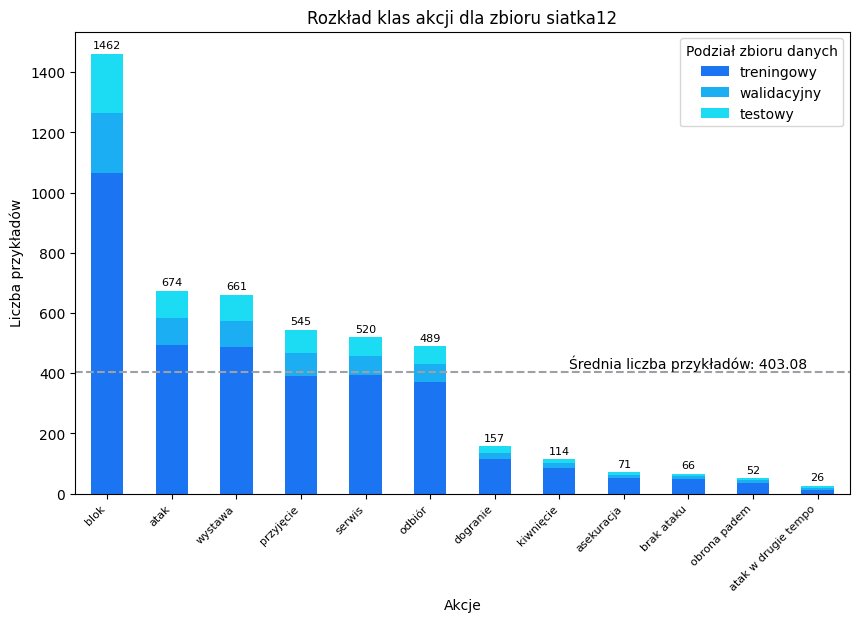

In [53]:
tts = {'train' : 'treningowy',
       'val' : 'walidacyjny',
       'test' : 'testowy'}

df = df_sports[df_sports['category'] == 'volleyball']

df['action'] = df['action'].str.replace(' ','_')

df['action'] = df['action'].map(dict_volleyball)

df['new_split'] = df['new_split'].map(tts)

grouped_action_x = df.groupby(['action', 'new_split']).size().unstack(fill_value=0)

sorted_grouped_action_x = grouped_action_x.loc[grouped_action_x.sum(axis=1).sort_values(ascending=False).index]

sorted_grouped_action_x = sorted_grouped_action_x[['treningowy', 'walidacyjny', 'testowy']]


average_count_sorted = sorted_grouped_action_x.sum(axis=1).mean()

sorted_grouped_action_x.plot(kind='bar', stacked=True, color=['#1b75f2', '#1baef2', '#1bdcf2'], figsize=(10, 6))

plt.axhline(average_count_sorted, color='#9da1a6', linestyle='--')

plt.text(len(sorted_grouped_action_x) - 3, average_count_sorted + 12, f'Średnia liczba przykładów: {average_count_sorted:.2f}', color='black', ha='center')

for i in range(len(sorted_grouped_action_x)):
    sum_values = sorted_grouped_action_x.iloc[i].sum()
    plt.text(i, sum_values + 10, str(sum_values), ha='center', va='bottom', fontsize=8,zorder=5)

plt.title('Rozkład klas akcji dla zbioru siatka12')
plt.xlabel('Akcje')
plt.ylabel('Liczba przykładów')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend(title='Podział zbioru danych')

plt.show()
